# Object Oriented Programming (OOP): Creating a Financial Instrument Class

## An example Class: pandas.DataFrame
Goal: handling and manipulating any Tabular Data (efficiently)

In [1]:
import pandas as pd

__Instantiation__

In [2]:
df = pd.read_csv("titanic.csv")

In [3]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,NaN
887,1,1,female,19.0,0,0,30.0000,S,B
888,0,3,female,NaN,1,2,23.4500,S,NaN
889,1,1,male,26.0,0,0,30.0000,C,C


In [4]:
type(df)

pandas.core.frame.DataFrame

__Attributes__

In [5]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'deck'],
      dtype='object')

In [6]:
df.shape

(891, 9)

__Methods__

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  889 non-null    object 
 8   deck      203 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [8]:
sorted = df.sort_values(by = "age", ascending = False)
sorted.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
630,1,1,male,80.0,0,0,30.0000,S,A
851,0,3,male,74.0,0,0,7.7750,S,NaN
493,0,1,male,71.0,0,0,49.5042,C,NaN
96,0,1,male,71.0,0,0,34.6542,C,A
116,0,3,male,70.5,0,0,7.7500,Q,NaN
672,0,2,male,70.0,0,0,10.5000,S,NaN
745,0,1,male,70.0,1,1,71.0000,S,B
33,0,2,male,66.0,0,0,10.5000,S,NaN
54,0,1,male,65.0,0,1,61.9792,C,B
280,0,3,male,65.0,0,0,7.7500,Q,NaN


## The FinancialInstrument Class live in action (Part 1)
Goal: Analyzing Financial Instruments (e.g. stocks) efficiently

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
plt.style.use("seaborn")

C:\Users\Al-Modhayan\AppData\Local\Temp\ipykernel_26648\3684037385.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [10]:
class FinancialInstrument():
    ''' Class for analyzing Financial Instruments like stocks.

    Attributes
    ==========
    ticker: str
        ticker symbol with which to work with
    start: str
        start date for data retrieval
    end: str
        end date for data retrieval
        
    Methods
    =======
    get_data:
        retrieves daily price data (from yahoo finance) and prepares the data
    log_returns:
        calculates log returns
    plot_prices:
        creates a price chart
    plot_returns:
        plots log returns either as time series ("ts") or histogram ("hist")
    set_ticker:
        sets a new ticker
    mean_return:
        calculates mean return
    std_returns:
        calculates the standard deviation of returns (risk)
    annualized_perf:
        calculates annulized return and risk
    '''
    
    def __init__(self, ticker, start, end):
        self.ticker = ticker
        self.start = start
        self.end = end
        self.get_data()
        self.log_returns()
    
    def __repr__(self): 
        return "FinancialInstrument(ticker = {}, start = {}, end = {})".format(self.ticker, 
                                                                               self.start, self.end)
    def get_data(self):
        ''' retrieves (from yahoo finance) and prepares the data
        '''
        raw = yf.download(self.ticker, self.start, self.end).Close.to_frame()
        raw.rename(columns = {"Close":"price"}, inplace = True)
        self.data = raw
        
    def log_returns(self):
        '''calculates log returns
        '''
        self.data["log_returns"] = np.log(self.data.price/self.data.price.shift(1))
        
    def plot_prices(self):
        ''' creates a price chart
        '''
        self.data.price.plot(figsize = (12, 8))
        plt.title("Price Chart: {}".format(self.ticker), fontsize = 15)
    
    def plot_returns(self, kind = "ts"):
        ''' plots log returns either as time series ("ts") or histogram ("hist")
        '''
        if kind == "ts":
            self.data.log_returns.plot(figsize = (12, 8))
            plt.title("Returns: {}".format(self.ticker), fontsize = 15)
        elif kind == "hist":
            self.data.log_returns.hist(figsize = (12, 8), bins = int(np.sqrt(len(self.data))))
            plt.title("Frequency of Returns: {}".format(self.ticker), fontsize = 15)
    
    def set_ticker(self, ticker = None):
        '''sets a new ticker
        '''
        if ticker is not None:
            self.ticker = ticker
            self.get_data()
            self.log_returns()
            
    def mean_return(self, freq = None):
        '''calculates mean return
        '''
        if freq is None:
            return self.data.log_returns.mean()
        else:
            resampled_price = self.data.price.resample(freq).last()
            resampled_returns = np.log(resampled_price / resampled_price.shift(1))
            return resampled_returns.mean()
    
    def std_returns(self, freq = None):
        '''calculates the standard deviation of returns (risk)
        '''
        if freq is None:
            return self.data.log_returns.std()
        else:
            resampled_price = self.data.price.resample(freq).last()
            resampled_returns = np.log(resampled_price / resampled_price.shift(1))
            return resampled_returns.std()
        
    def annualized_perf(self):
        '''calculates annulized return and risk
        '''
        mean_return = round(self.data.log_returns.mean() * 252, 3)
        risk = round(self.data.log_returns.std() * np.sqrt(252), 3)
        print("Return: {} | Risk: {}".format(mean_return, risk))

__Instantiation__

In [11]:
stock = FinancialInstrument(ticker = "AAPL", start = "2015-01-01", 
                            end =  "2022-10-10" ) # instantiation

[*********************100%***********************]  1 of 1 completed


In [12]:
stock

FinancialInstrument(ticker = AAPL, start = 2015-01-01, end = 2022-10-10)

In [13]:
type(stock)

__main__.FinancialInstrument

__Attributes__

In [14]:
# stock. 

In [15]:
stock.ticker

'AAPL'

In [16]:
stock.start

'2015-01-01'

In [17]:
stock.end

'2022-10-10'

In [18]:
stock.data

,price,log_returns
Date,,
2015-01-02 00:00:00-05:00,27.332500,NaN
2015-01-05 00:00:00-05:00,26.562500,-0.028576
2015-01-06 00:00:00-05:00,26.565001,0.000094
2015-01-07 00:00:00-05:00,26.937500,0.013925
2015-01-08 00:00:00-05:00,27.972500,0.037703
...,...,...
2022-10-03 00:00:00-04:00,142.449997,0.030289
2022-10-04 00:00:00-04:00,146.100006,0.025300
2022-10-05 00:00:00-04:00,146.399994,0.002051


__Methods__

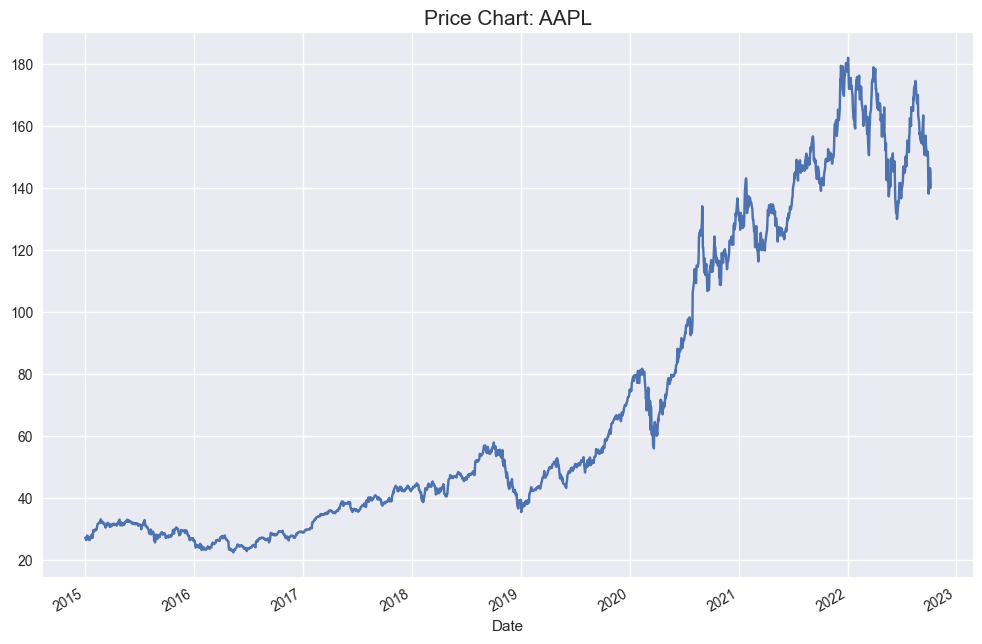

In [19]:
stock.plot_prices()

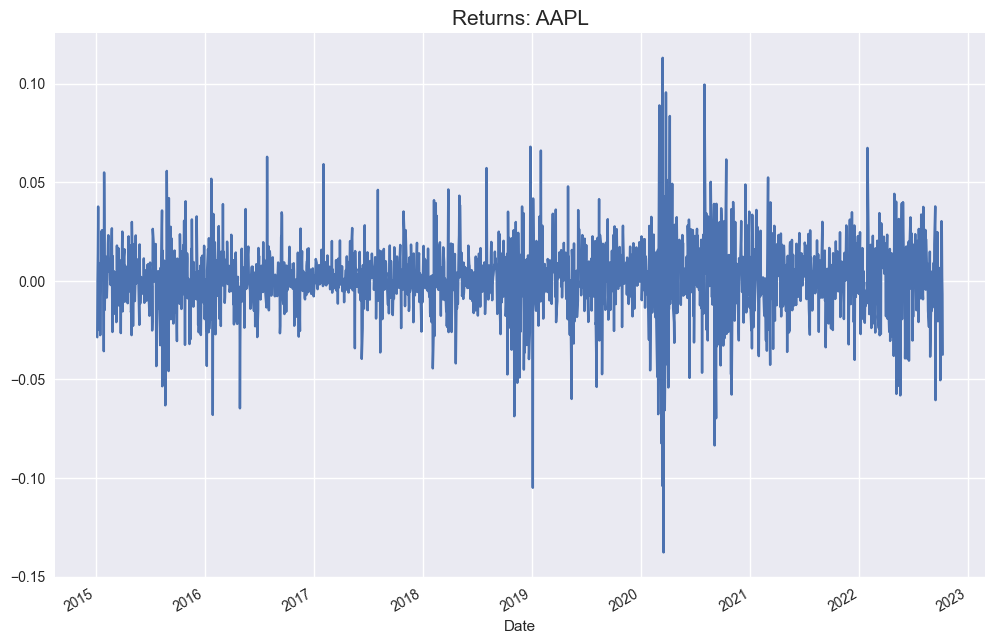

In [20]:
stock.plot_returns()

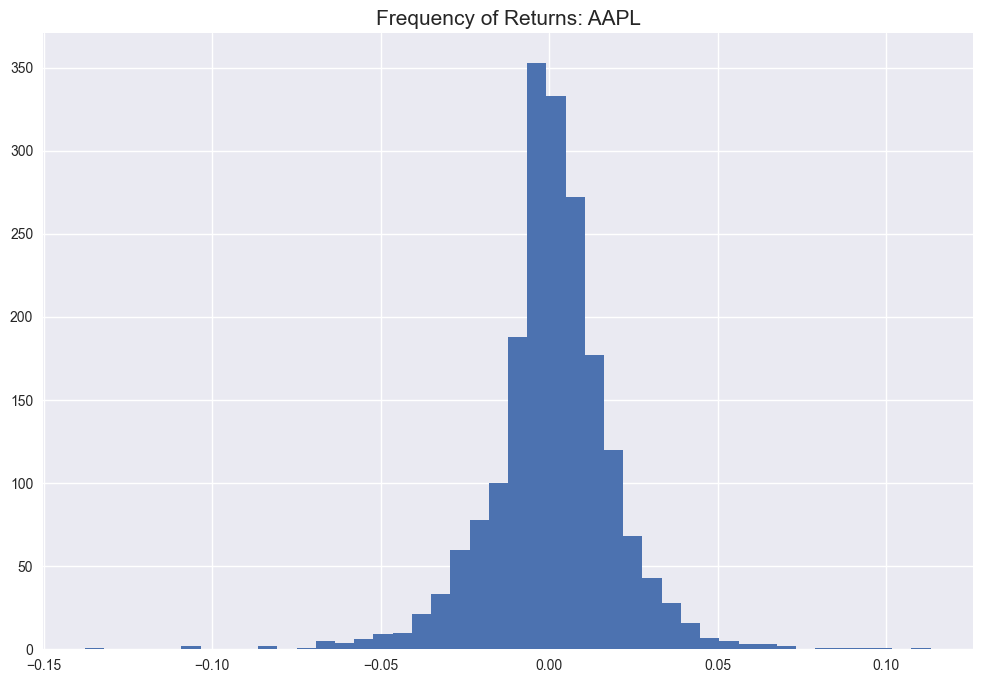

In [21]:
stock.plot_returns(kind = "hist")

## The FinancialInstrument Class live in action (Part 2)

__More Methods__

In [22]:
stock.mean_return()

0.0008359123069015043

In [23]:
stock.data.log_returns.mean()

0.0008359123069015043

In [24]:
stock.mean_return(freq = "w")

0.004035082864178856

In [25]:
stock.std_returns()

0.018667027483399472

In [26]:
stock.std_returns(freq = "w")

0.03866274542829451

In [27]:
stock.annualized_perf()

Return: 0.211 | Risk: 0.296


In [28]:
stock.set_ticker("GE")

[*********************100%***********************]  1 of 1 completed


In [29]:
stock.ticker

'GE'

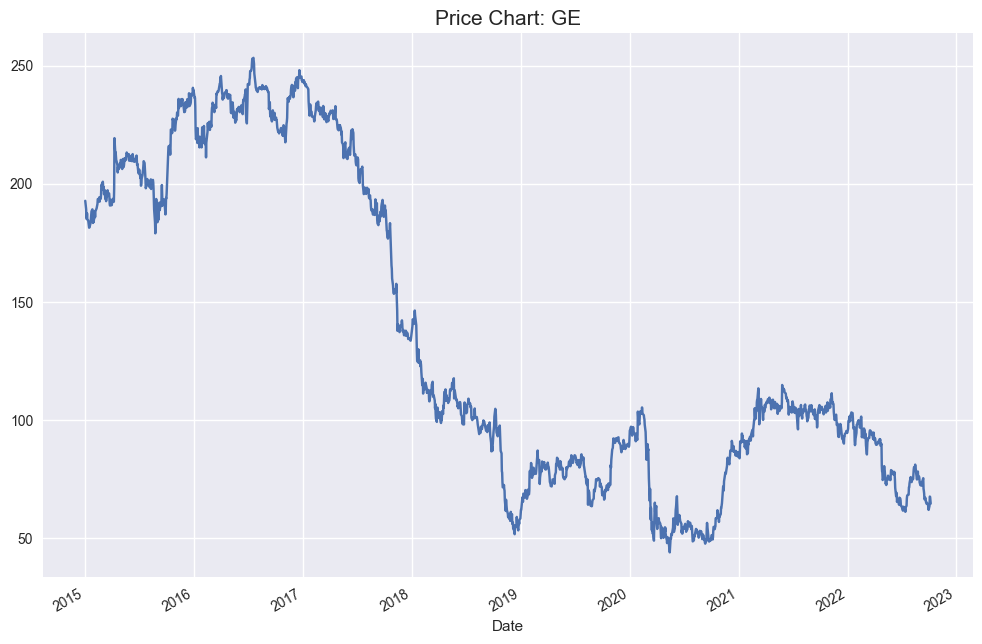

In [30]:
stock.plot_prices()

In [31]:
stock.annualized_perf()

Return: -0.141 | Risk: 0.368


## Building the FinancialInstrument Class from scratch: Instantiation

In [32]:
class FinancialInstrument():
    pass

In [33]:
stock = FinancialInstrument() # instantiation

In [34]:
stock

In [35]:
class FinancialInstrument():
    def __init__(self, ticker, start, end):
        self.ticker = ticker
        self.start = start
        self.end = end

In [36]:
stock = FinancialInstrument("AAPL", "2015-01-01", "2019-12-31") # instantiation

In [37]:
stock

In [38]:
stock.ticker

'AAPL'

In [39]:
stock.end

'2019-12-31'

In [40]:
stock.start

'2015-01-01'

## The method get_data()

In [41]:
yf.download("BTC-USD", "2015-01-01", "2022-09-30").Close.to_frame()

[*********************100%***********************]  1 of 1 completed


,Close
Date,
2015-01-01 00:00:00+00:00,314.248993
2015-01-02 00:00:00+00:00,315.032013
2015-01-03 00:00:00+00:00,281.082001
2015-01-04 00:00:00+00:00,264.195007
2015-01-05 00:00:00+00:00,274.473999
...,...
2022-09-25 00:00:00+00:00,18802.097656
2022-09-26 00:00:00+00:00,19222.671875
2022-09-27 00:00:00+00:00,19110.546875


In [42]:
raw = yf.download("BTC-USD", "2015-01-01", "2022-09-30").Close.to_frame()

[*********************100%***********************]  1 of 1 completed


In [43]:
raw.rename(columns = {"Close":"price"}, inplace = True)

In [44]:
raw

,price
Date,
2015-01-01 00:00:00+00:00,314.248993
2015-01-02 00:00:00+00:00,315.032013
2015-01-03 00:00:00+00:00,281.082001
2015-01-04 00:00:00+00:00,264.195007
2015-01-05 00:00:00+00:00,274.473999
...,...
2022-09-25 00:00:00+00:00,18802.097656
2022-09-26 00:00:00+00:00,19222.671875
2022-09-27 00:00:00+00:00,19110.546875


In [45]:
class FinancialInstrument():
    def __init__(self, ticker, start, end):
        self.ticker = ticker
        self.start = start
        self.end = end
        self.get_data()
    def get_data(self):
        raw = yf.download(self.ticker, self.start, self.end).Close.to_frame()
        raw.rename(columns = {"Close":"price"})
        self.data = raw

In [46]:
stock = FinancialInstrument("BTC-USD", "2015-01-01", "2022-09-30")

[*********************100%***********************]  1 of 1 completed


In [47]:
stock.ticker

'BTC-USD'

In [48]:
stock.data

,Close
Date,
2015-01-01 00:00:00+00:00,314.248993
2015-01-02 00:00:00+00:00,315.032013
2015-01-03 00:00:00+00:00,281.082001
2015-01-04 00:00:00+00:00,264.195007
2015-01-05 00:00:00+00:00,274.473999
...,...
2022-09-25 00:00:00+00:00,18802.097656
2022-09-26 00:00:00+00:00,19222.671875
2022-09-27 00:00:00+00:00,19110.546875


## The method log_returns()

In [49]:
stock.data

,Close
Date,
2015-01-01 00:00:00+00:00,314.248993
2015-01-02 00:00:00+00:00,315.032013
2015-01-03 00:00:00+00:00,281.082001
2015-01-04 00:00:00+00:00,264.195007
2015-01-05 00:00:00+00:00,274.473999
...,...
2022-09-25 00:00:00+00:00,18802.097656
2022-09-26 00:00:00+00:00,19222.671875
2022-09-27 00:00:00+00:00,19110.546875


In [50]:
class FinancialInstrument():
    def __init__(self, ticker, start, end):
        self.ticker = ticker
        self.start = start
        self.end = end
        self.get_data()
        self.log_returns()
        
    def get_data(self):
        raw = yf.download(self.ticker, self.start, self.end).Close.to_frame()
        raw.rename(columns = {"Close":"price"}, inplace = True)
        self.data = raw
    def log_returns(self):
        self.data["log_returns"] = np.log(self.data.price/self.data.price.shift(1))

In [51]:
stock = FinancialInstrument("btc-usd", "2015-01-01", "2022-09-30")

[*********************100%***********************]  1 of 1 completed


In [52]:
stock.data

,price,log_returns
Date,,
2015-01-01 00:00:00+00:00,314.248993,NaN
2015-01-02 00:00:00+00:00,315.032013,0.002489
2015-01-03 00:00:00+00:00,281.082001,-0.114028
2015-01-04 00:00:00+00:00,264.195007,-0.061959
2015-01-05 00:00:00+00:00,274.473999,0.038169
...,...,...
2022-09-25 00:00:00+00:00,18802.097656,-0.007150
2022-09-26 00:00:00+00:00,19222.671875,0.022122
2022-09-27 00:00:00+00:00,19110.546875,-0.005850


In [53]:
stock.log_returns()

## (String) Representation

In [54]:
stock

In [55]:
print(stock)

In [56]:
class FinancialInstrument():
    def __init__(self, ticker, start, end):
        self.ticker = ticker
        self.start = start
        self.end = end
        self.get_data()
        self.log_returns()
    
    def __repr__(self):
        return "FinancialInstrument(ticker = {}, start = {}, end = {})".format(self.ticker,
                                                                               self.start, self.end)
    def get_data(self):
        raw = yf.download(self.ticker, self.start, self.end).Close.to_frame()
        raw.rename(columns = {"Close":"price"}, inplace = True)
        self.data = raw
        
    def log_returns(self):
        self.data["log_returns"] = np.log(self.data.price/self.data.price.shift(1))

In [57]:
stock = FinancialInstrument("AAPL", "2015-01-01", "2021-12-31")

[*********************100%***********************]  1 of 1 completed


In [58]:
stock

FinancialInstrument(ticker = AAPL, start = 2015-01-01, end = 2021-12-31)

In [59]:
print(stock)

FinancialInstrument(ticker = AAPL, start = 2015-01-01, end = 2021-12-31)


## The methods plot_prices() and plot_returns()

In [60]:
stock

FinancialInstrument(ticker = AAPL, start = 2015-01-01, end = 2021-12-31)

In [61]:
stock.data

,price,log_returns
Date,,
2015-01-02 00:00:00-05:00,27.332500,NaN
2015-01-05 00:00:00-05:00,26.562500,-0.028576
2015-01-06 00:00:00-05:00,26.565001,0.000094
2015-01-07 00:00:00-05:00,26.937500,0.013925
2015-01-08 00:00:00-05:00,27.972500,0.037703
...,...,...
2021-12-23 00:00:00-05:00,176.279999,0.003637
2021-12-27 00:00:00-05:00,180.330002,0.022715
2021-12-28 00:00:00-05:00,179.289993,-0.005784


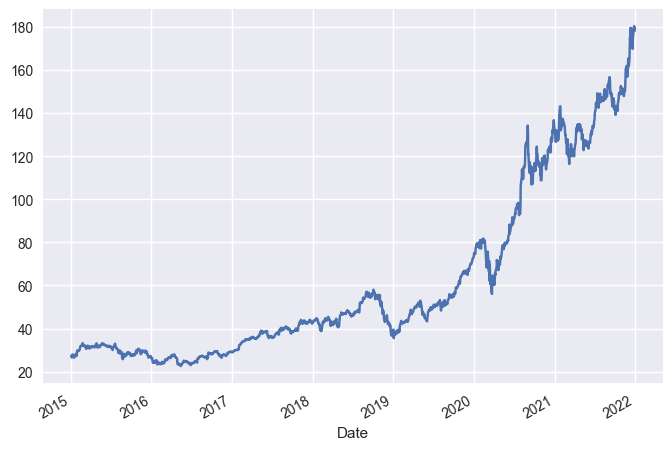

In [62]:
stock.data.price.plot()
plt.show()

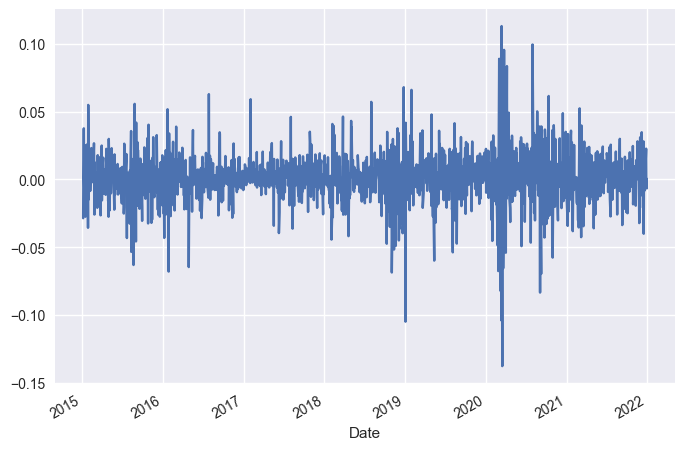

In [63]:
stock.data.log_returns.plot()
plt.show()

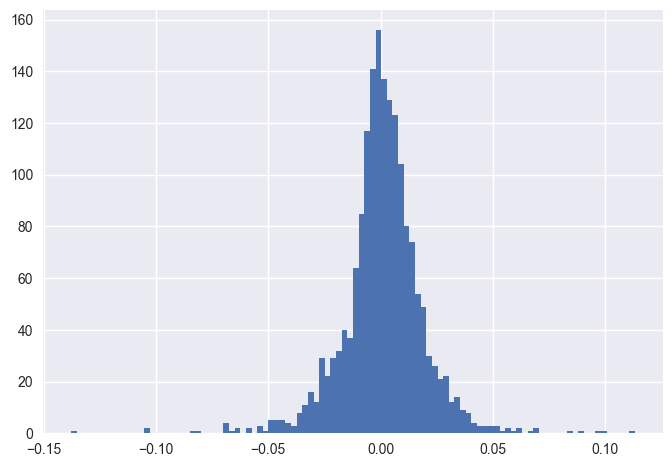

In [64]:
stock.data.log_returns.hist(bins = 100)
plt.show()

In [65]:
class FinancialInstrument():
    def __init__(self, ticker, start, end):
        self.ticker = ticker
        self.start = start
        self.end = end
        self.get_data()
        self.log_returns()
    
    def __repr__(self): 
        return "FinancialInstrument(ticker = {}, start = {}, end = {})".format(self.ticker, 
                                                                               self.start, self.end)
    def get_data(self):
        raw = yf.download(self.ticker, self.start, self.end).Close.to_frame()
        raw.rename(columns = {"Close":"price"}, inplace = True)
        self.data = raw
        
    def log_returns(self):
        self.data["log_returns"] = np.log(self.data.price/self.data.price.shift(1))
        
    def plot_prices(self):
        self.data.price.plot(figsize = (12, 8))
        plt.title("Price Chart: {}".format(self.ticker), fontsize = 15)
    
    def plot_returns(self, kind = "ts"):
        if kind == "ts":
            self.data.log_returns.plot(figsize = (12, 8))
            plt.title("Returns: {}".format(self.ticker), fontsize = 15)
        elif kind == "hist":
            self.data.log_returns.hist(figsize = (12, 8), bins = int(np.sqrt(len(self.data))))
            plt.title("Frequency of Returns: {}".format(self.ticker), fontsize = 15)  

In [66]:
stock = FinancialInstrument("aapl", "2015-01-01", "2019-12-31")

[*********************100%***********************]  1 of 1 completed


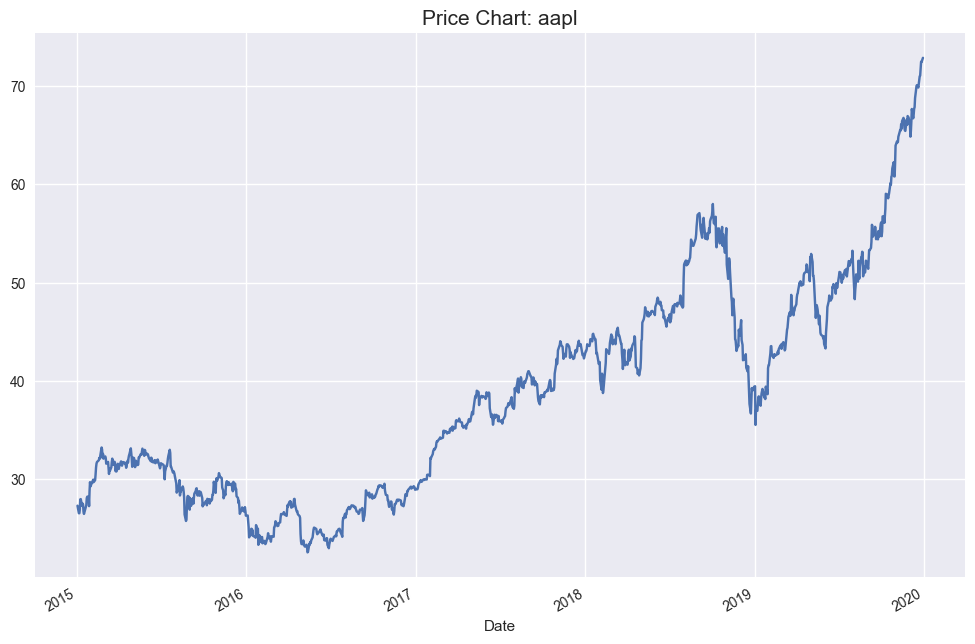

In [67]:
stock.plot_prices()

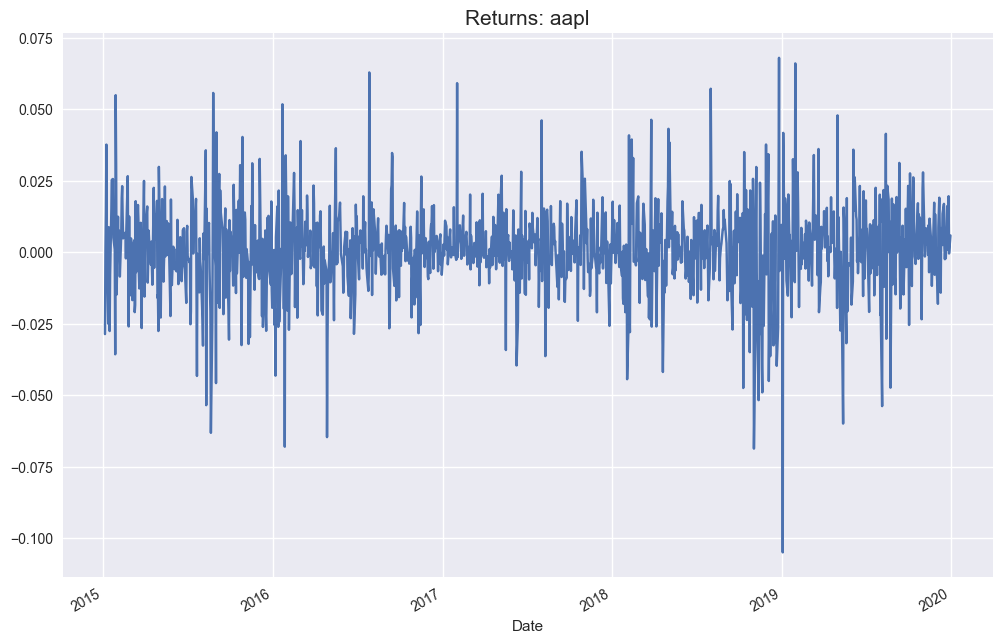

In [68]:
stock.plot_returns()

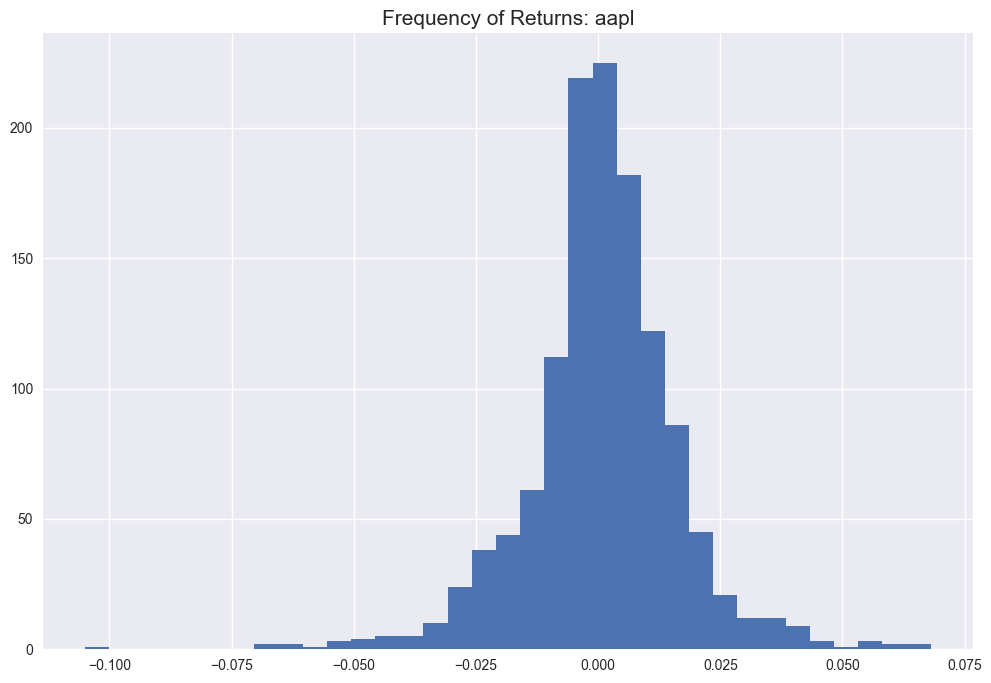

In [69]:
stock.plot_returns(kind = "hist")

## Encapsulation

In [70]:
stock

FinancialInstrument(ticker = aapl, start = 2015-01-01, end = 2019-12-31)

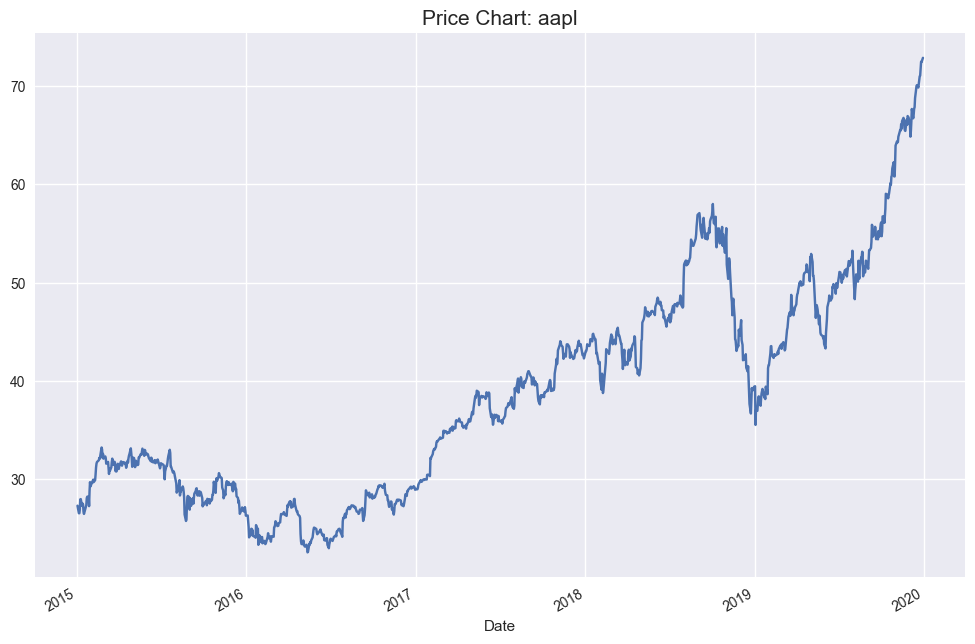

In [71]:
stock.plot_prices()

In [72]:
stock.ticker

'aapl'

In [73]:
stock.ticker = "GE"

In [74]:
stock.ticker

'GE'

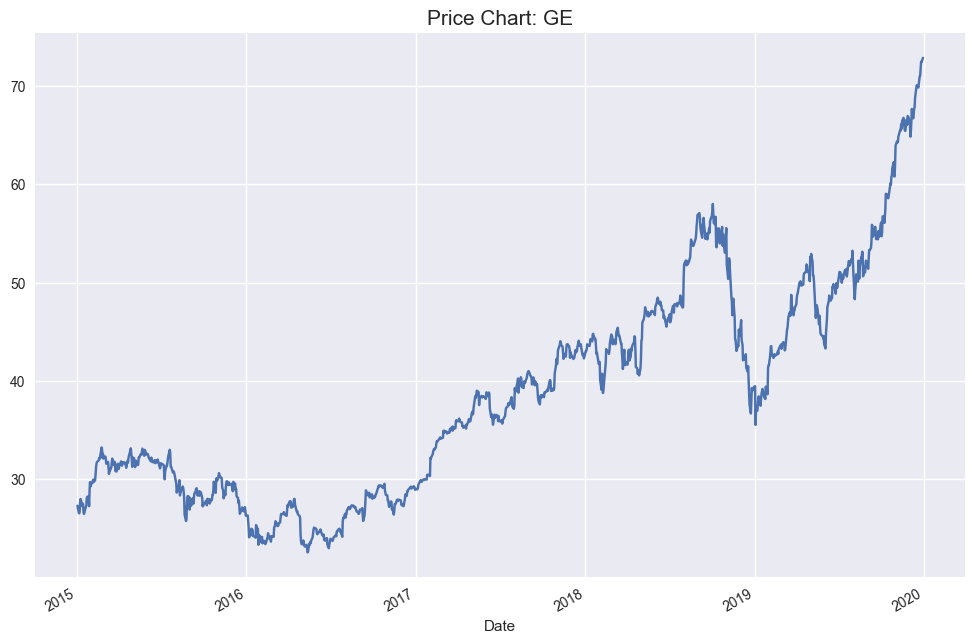

In [75]:
stock.plot_prices()

In [80]:
class FinancialInstrument():
    def __init__(self, ticker, start, end):
        self._ticker = ticker
        self.start = start
        self.end = end
        self.get_data()
        self.log_returns()
    
    def __repr__(self): 
        return "FinancialInstrument(ticker = {}, start = {}, end = {})".format(self._ticker, 
                                                                               self.start, self.end)
    def get_data(self):
        raw = yf.download(self._ticker, self.start, self.end).Close.to_frame()
        raw.rename(columns = {"Close":"price"}, inplace = True)
        self.data = raw
        
    def log_returns(self):
        self.data["log_returns"] = np.log(self.data.price/self.data.price.shift(1))
        
    def plot_prices(self):
        self.data.price.plot(figsize = (12, 8))
        plt.title("Price Chart: {}".format(self._ticker), fontsize = 15)
    
    def plot_returns(self, kind = "ts"):
        if kind == "ts":
            self.data.log_returns.plot(figsize = (12, 8))
            plt.title("Returns: {}".format(self._ticker), fontsize = 15)
        elif kind == "hist":
            self.data.log_returns.hist(figsize = (12, 8), bins = int(np.sqrt(len(self.data))))
            plt.title("Frequency of Returns: {}".format(self._ticker), fontsize = 15)

In [81]:
stock = FinancialInstrument("aapl", "2015-01-01", "2019-12-31")

[*********************100%***********************]  1 of 1 completed


In [82]:
stock

FinancialInstrument(ticker = aapl, start = 2015-01-01, end = 2019-12-31)

In [83]:
stock.ticker

AttributeError: 'FinancialInstrument' object has no attribute 'ticker'

In [ ]:
# stock.

In [84]:
stock._ticker

'aapl'

## The method set_ticker()

In [85]:
class FinancialInstrument():
    def __init__(self, ticker, start, end):
        self._ticker = ticker
        self.start = start
        self.end = end
        self.get_data()
        self.log_returns()
    
    def __repr__(self): 
        return "FinancialInstrument(ticker = {}, start = {}, end = {})".format(self._ticker, 
                                                                               self.start, self.end)
    def get_data(self):
        raw = yf.download(self._ticker, self.start, self.end).Close.to_frame()
        raw.rename(columns = {"Close":"price"}, inplace = True)
        self.data = raw
        
    def log_returns(self):
        self.data["log_returns"] = np.log(self.data.price/self.data.price.shift(1))
        
    def plot_prices(self):
        self.data.price.plot(figsize = (12, 8))
        plt.title("Price Chart: {}".format(self._ticker), fontsize = 15)
    
    def plot_returns(self, kind = "ts"):
        if kind == "ts":
            self.data.log_returns.plot(figsize = (12, 8))
            plt.title("Returns: {}".format(self._ticker), fontsize = 15)
        elif kind == "hist":
            self.data.log_returns.hist(figsize = (12, 8), bins = int(np.sqrt(len(self.data))))
            plt.title("Frequency of Returns: {}".format(self._ticker), fontsize = 15)
    
    def set_ticker(self, ticker = None):
        if ticker is not None:
            self._ticker = ticker
            self.get_data()
            self.log_returns()

In [86]:
stock = FinancialInstrument("aapl", "2015-01-01", "2019-12-31")

[*********************100%***********************]  1 of 1 completed


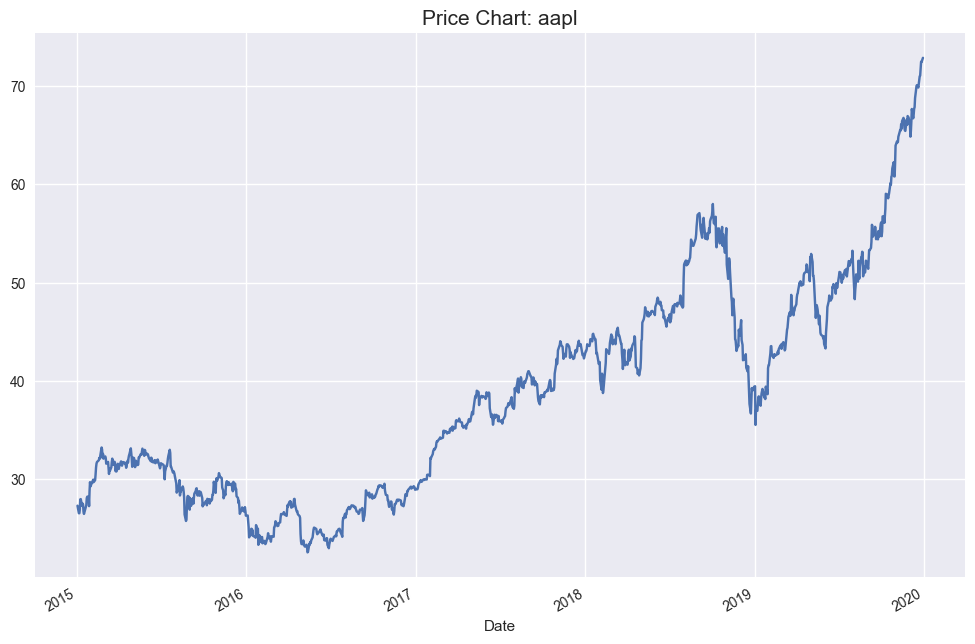

In [87]:
stock.plot_prices()

In [88]:
stock.set_ticker("GE")

[*********************100%***********************]  1 of 1 completed


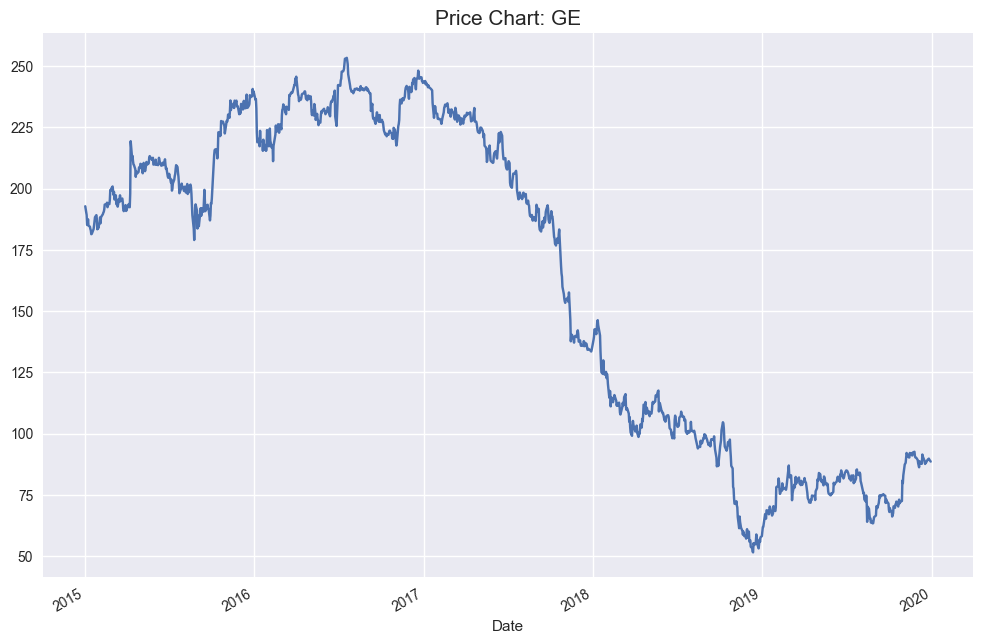

In [89]:
stock.plot_prices()

## Adding more methods and performance metrics

In [91]:
class FinancialInstrument():
    def __init__(self, ticker, start, end):
        self._ticker = ticker
        self.start = start
        self.end = end
        self.get_data()
        self.log_returns()
    
    def __repr__(self): 
        return "FinancialInstrument(ticker = {}, start = {}, end = {})".format(self._ticker, 
                                                                               self.start, self.end)
    def get_data(self):
        raw = yf.download(self._ticker, self.start, self.end).Close.to_frame()
        raw.rename(columns = {"Close":"price"}, inplace = True)
        self.data = raw
        
    def log_returns(self):
        self.data["log_returns"] = np.log(self.data.price/self.data.price.shift(1))
        
    def plot_prices(self):
        self.data.price.plot(figsize = (12, 8))
        plt.title("Price Chart: {}".format(self._ticker), fontsize = 15)
    
    def plot_returns(self, kind = "ts"):
        if kind == "ts":
            self.data.log_returns.plot(figsize = (12, 8))
            plt.title("Returns: {}".format(self._ticker), fontsize = 15)
        elif kind == "hist":
            self.data.log_returns.hist(figsize = (12, 8), bins = int(np.sqrt(len(self.data))))
            plt.title("Frequency of Returns: {}".format(self._ticker), fontsize = 15)
    
    def set_ticker(self, ticker = None):
        if ticker is not None:
            self._ticker = ticker
            self.get_data()
            self.log_returns()
            
    def mean_return(self, freq = None):
        if freq is None:
            return self.data.log_returns.mean()
        else:
            resampled_price = self.data.price.resample(freq).last()
            resampled_returns = np.log(resampled_price / resampled_price.shift(1))
            return resampled_returns.mean()
    
    def std_returns(self, freq = None):
        if freq is None:
            return self.data.log_returns.std()
        else:
            resampled_price = self.data.price.resample(freq).last()
            resampled_returns = np.log(resampled_price / resampled_price.shift(1))
            return resampled_returns.std()
        
    def annualized_perf(self):
        mean_return = round(self.data.log_returns.mean() * 252, 3)
        risk = round(self.data.log_returns.std() * np.sqrt(252), 3)
        print("Return: {} | Risk: {}".format(mean_return, risk))

In [92]:
stock = FinancialInstrument("aapl", "2015-01-01", "2019-12-31")

[*********************100%***********************]  1 of 1 completed


In [93]:
stock.mean_return()

0.0007808421402793629

In [100]:
stock.mean_return("w")

0.0037576158168232733

In [97]:
stock.std_returns()

0.01569292603658385

In [98]:
stock.std_returns("a")

0.3031286167641461

In [101]:
stock.annualized_perf()

Return: 0.197 | Risk: 0.249


: 

## Inheritance

In [102]:
class FinancialInstrumentBase(): # Parent
    def __init__(self, ticker, start, end):
        self._ticker = ticker
        self.start = start
        self.end = end
        self.get_data()
        self.log_returns()
    
    def __repr__(self): 
        return "FinancialInstrument(ticker = {}, start = {}, end = {})".format(self._ticker, 
                                                                               self.start, self.end)
    def get_data(self):
        raw = yf.download(self._ticker, self.start, self.end).Close.to_frame()
        raw.rename(columns = {"Close":"price"}, inplace = True)
        self.data = raw
        
    def log_returns(self):
        self.data["log_returns"] = np.log(self.data.price/self.data.price.shift(1))
        
    def plot_prices(self):
        self.data.price.plot(figsize = (12, 8))
        plt.title("Price Chart: {}".format(self._ticker), fontsize = 15)
    
    def plot_returns(self, kind = "ts"):
        if kind == "ts":
            self.data.log_returns.plot(figsize = (12, 8))
            plt.title("Returns: {}".format(self._ticker), fontsize = 15)
        elif kind == "hist":
            self.data.log_returns.hist(figsize = (12, 8), bins = int(np.sqrt(len(self.data))))
            plt.title("Frequency of Returns: {}".format(self._ticker), fontsize = 15)
    
    def set_ticker(self, ticker = None):
        if ticker is not None:
            self._ticker = ticker
            self.get_data()
            self.log_returns()

In [104]:
class RiskReturn(FinancialInstrumentBase): # Child
    
    def __repr__(self): 
        return "RiskReturn(ticker = {}, start = {}, end = {})".format(self._ticker, 
                                                                          self.start, self.end)
    def mean_return(self, freq = None):
        if freq is None:
            return self.data.log_returns.mean()
        else:
            resampled_price = self.data.price.resample(freq).last()
            resampled_returns = np.log(resampled_price / resampled_price.shift(1))
            return resampled_returns.mean()
    
    def std_returns(self, freq = None):
        if freq is None:
            return self.data.log_returns.std()
        else:
            resampled_price = self.data.price.resample(freq).last()
            resampled_returns = np.log(resampled_price / resampled_price.shift(1))
            return resampled_returns.std()
        
    def annualized_perf(self):
        mean_return = round(self.data.log_returns.mean() * 252, 3)
        risk = round(self.data.log_returns.std() * np.sqrt(252), 3)
        print("Return: {} | Risk: {}".format(mean_return, risk))

In [105]:
stock = RiskReturn("aapl", "2015-01-01", "2019-12-31")

[*********************100%***********************]  1 of 1 completed


In [106]:
stock.annualized_perf()

Return: 0.197 | Risk: 0.249


In [107]:
stock.data

,price,log_returns
Date,,
2015-01-02 00:00:00-05:00,27.332500,NaN
2015-01-05 00:00:00-05:00,26.562500,-0.028576
2015-01-06 00:00:00-05:00,26.565001,0.000094
2015-01-07 00:00:00-05:00,26.937500,0.013925
2015-01-08 00:00:00-05:00,27.972500,0.037703
...,...,...
2019-12-23 00:00:00-05:00,71.000000,0.016187
2019-12-24 00:00:00-05:00,71.067497,0.000950
2019-12-26 00:00:00-05:00,72.477501,0.019646


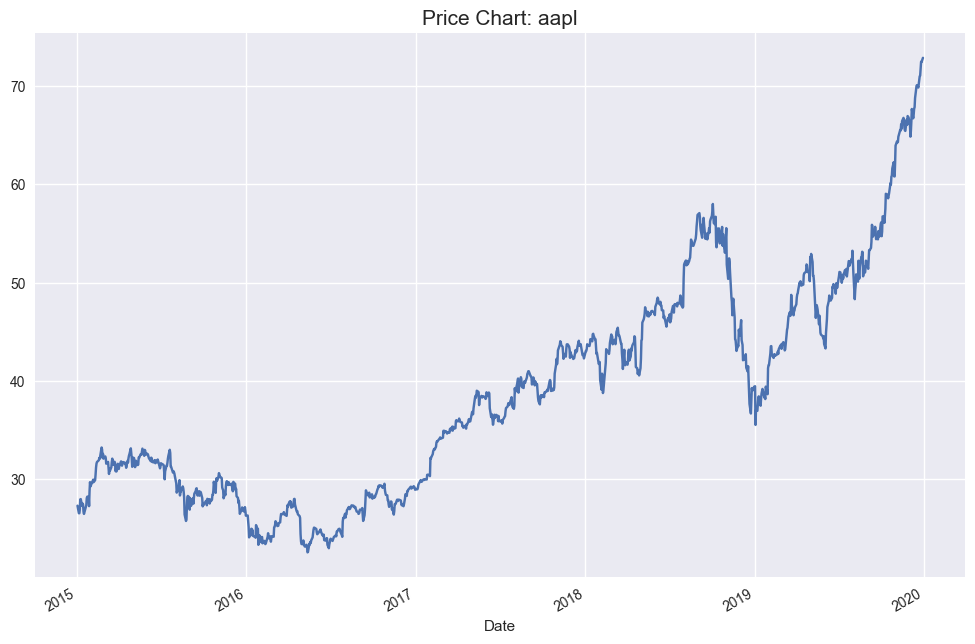

In [108]:
stock.plot_prices()

In [109]:
stock.set_ticker("ge")

[*********************100%***********************]  1 of 1 completed


In [110]:
stock

RiskReturn(ticker = ge, start = 2015-01-01, end = 2019-12-31)

In [111]:
stock.mean_return("w")

-0.0029766687261518353

## Inheritance and the super() Function

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
plt.style.use("seaborn")

C:\Users\Al-Modhayan\AppData\Local\Temp\ipykernel_26648\3684037385.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [113]:
class FinancialInstrumentBase(): # Parent
    def __init__(self, ticker, start, end):
        self._ticker = ticker
        self.start = start
        self.end = end
        self.get_data()
        self.log_returns()
    
    def __repr__(self): 
        return "FinancialInstrument(ticker = {}, start = {}, end = {})".format(self._ticker, 
                                                                               self.start, self.end)
    def get_data(self):
        raw = yf.download(self._ticker, self.start, self.end).Close.to_frame()
        raw.rename(columns = {"Close":"price"}, inplace = True)
        self.data = raw
        
    def log_returns(self):
        self.data["log_returns"] = np.log(self.data.price/self.data.price.shift(1))
        
    def plot_prices(self):
        self.data.price.plot(figsize = (12, 8))
        plt.title("Price Chart: {}".format(self._ticker), fontsize = 15)
    
    def plot_returns(self, kind = "ts"):
        if kind == "ts":
            self.data.log_returns.plot(figsize = (12, 8))
            plt.title("Returns: {}".format(self._ticker), fontsize = 15)
        elif kind == "hist":
            self.data.log_returns.hist(figsize = (12, 8), bins = int(np.sqrt(len(self.data))))
            plt.title("Frequency of Returns: {}".format(self._ticker), fontsize = 15)
    
    def set_ticker(self, ticker = None):
        if ticker is not None:
            self._ticker = ticker
            self.get_data()
            self.log_returns()

In [114]:
class RiskReturn(FinancialInstrumentBase): # Child
    
    def __init__(self, ticker, start, end, freq = None):
        self.freq = freq
        super().__init__(ticker, start, end)
    
    def __repr__(self): 
        return "RiskReturn(ticker = {}, start = {}, end = {})".format(self._ticker, 
                                                                          self.start, self.end)
    def mean_return(self):
        if self.freq is None:
            return self.data.log_returns.mean()
        else:
            resampled_price = self.data.price.resample(self.freq).last()
            resampled_returns = np.log(resampled_price / resampled_price.shift(1))
            return resampled_returns.mean()
    
    def std_returns(self):
        if self.freq is None:
            return self.data.log_returns.std()
        else:
            resampled_price = self.data.price.resample(self.freq).last()
            resampled_returns = np.log(resampled_price / resampled_price.shift(1))
            return resampled_returns.std()
        
    def annualized_perf(self):
        mean_return = round(self.data.log_returns.mean() * 252, 3)
        risk = round(self.data.log_returns.std() * np.sqrt(252), 3)
        print("Return: {} | Risk: {}".format(mean_return, risk))

In [115]:
stock = RiskReturn("aapl", "2015-01-01", "2019-12-31", freq = "w")

[*********************100%***********************]  1 of 1 completed


In [116]:
stock.freq

'w'

In [117]:
stock._ticker

'aapl'

In [118]:
stock.data

,price,log_returns
Date,,
2015-01-02 00:00:00-05:00,27.332500,NaN
2015-01-05 00:00:00-05:00,26.562500,-0.028576
2015-01-06 00:00:00-05:00,26.565001,0.000094
2015-01-07 00:00:00-05:00,26.937500,0.013925
2015-01-08 00:00:00-05:00,27.972500,0.037703
...,...,...
2019-12-23 00:00:00-05:00,71.000000,0.016187
2019-12-24 00:00:00-05:00,71.067497,0.000950
2019-12-26 00:00:00-05:00,72.477501,0.019646


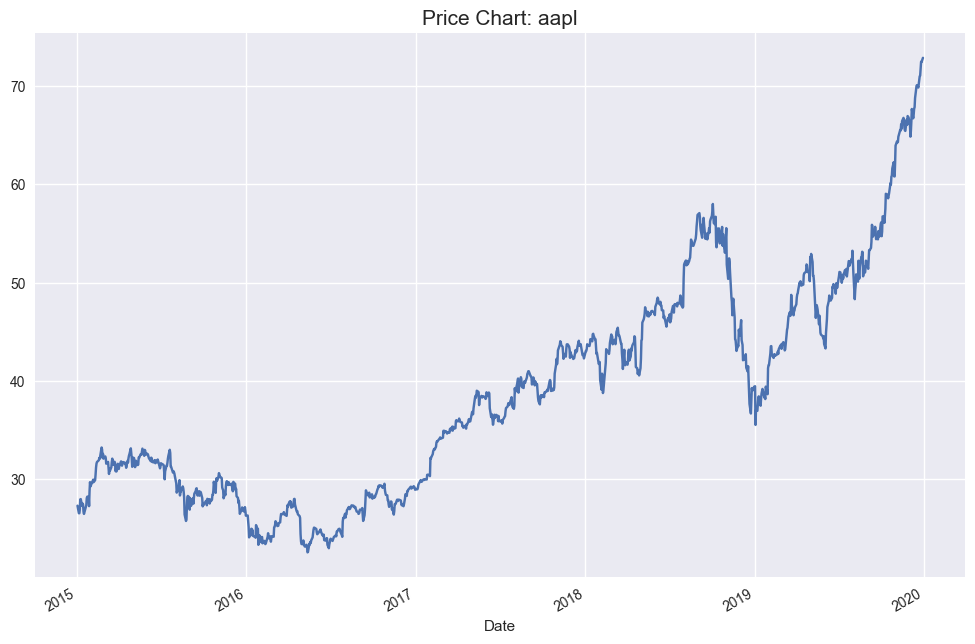

In [119]:
stock.plot_prices()

In [120]:
stock.mean_return()

0.0037576158168232733

In [121]:
stock.annualized_perf()

Return: 0.197 | Risk: 0.249


## Docstrings

In [122]:
class FinancialInstrument():
    ''' Class to analyze Financial Instruments like stocks
    '''
    def __init__(self, ticker, start, end):
        self._ticker = ticker
        self.start = start
        self.end = end
        self.get_data()
        self.log_returns()
    
    def __repr__(self): 
        return "FinancialInstrument(ticker = {}, start = {}, end = {})".format(self._ticker, 
                                                                               self.start, self.end)
    def get_data(self):
        raw = yf.download(self._ticker, self.start, self.end).Close.to_frame()
        raw.rename(columns = {"Close":"price"}, inplace = True)
        self.data = raw
        
    def log_returns(self):
        self.data["log_returns"] = np.log(self.data.price/self.data.price.shift(1))
        
    def plot_prices(self):
        self.data.price.plot(figsize = (12, 8))
        plt.title("Price Chart: {}".format(self._ticker), fontsize = 15)
    
    def plot_returns(self, kind = "ts"):
        ''' plots log returns either as time series ("ts") or as histogram ("hist")
        '''
        if kind == "ts":
            self.data.log_returns.plot(figsize = (12, 8))
            plt.title("Returns: {}".format(self._ticker), fontsize = 15)
        elif kind == "hist":
            self.data.log_returns.hist(figsize = (12, 8), bins = int(np.sqrt(len(self.data))))
            plt.title("Frequency of Returns: {}".format(self._ticker), fontsize = 15)
    
    def set_ticker(self, ticker = None):
        if ticker is not None:
            self._ticker = ticker
            self.get_data()
            self.log_returns()
            
    def mean_return(self, freq = None):
        if freq is None:
            return self.data.log_returns.mean()
        else:
            resampled_price = self.data.price.resample(freq).last()
            resampled_returns = np.log(resampled_price / resampled_price.shift(1))
            return resampled_returns.mean()
    
    def std_returns(self, freq = None):
        if freq is None:
            return self.data.log_returns.std()
        else:
            resampled_price = self.data.price.resample(freq).last()
            resampled_returns = np.log(resampled_price / resampled_price.shift(1))
            return resampled_returns.std()
        
    def annualized_perf(self):
        mean_return = round(self.data.log_returns.mean() * 252, 3)
        risk = round(self.data.log_returns.std() * np.sqrt(252), 3)
        print("Return: {} | Risk: {}".format(mean_return, risk))

__Final Version__

In [123]:
class FinancialInstrument():
    ''' Class for analyzing Financial Instruments like stocks.

    Attributes
    ==========
    ticker: str
        ticker symbol with which to work with
    start: str
        start date for data retrieval
    end: str
        end date for data retrieval

    Methods
    =======
    get_data:
        retrieves daily price data (from yahoo finance) and prepares the data
    log_returns:
        calculates log returns
    plot_prices:
        creates a price chart
    plot_returns:
        plots log returns either as time series ("ts") or histogram ("hist")
    set_ticker:
        sets a new ticker
    mean_return:
        calculates mean return
    std_returns:
        calculates the standard deviation of returns (risk)
    annualized_perf:
        calculates annulized return and risk
    '''
    
    def __init__(self, ticker, start, end):
        self._ticker = ticker
        self.start = start
        self.end = end
        self.get_data()
        self.log_returns()
    
    def __repr__(self): 
        return "FinancialInstrument(ticker = {}, start = {}, end = {})".format(self._ticker, 
                                                                               self.start, self.end)
    def get_data(self):
        ''' retrieves (from yahoo finance) and prepares the data
        '''
        raw = yf.download(self._ticker, self.start, self.end).Close.to_frame()
        raw.rename(columns = {"Close":"price"}, inplace = True)
        self.data = raw
        
    def log_returns(self):
        '''calculates log returns
        '''
        self.data["log_returns"] = np.log(self.data.price/self.data.price.shift(1))
        
    def plot_prices(self):
        ''' creates a price chart
        '''
        self.data.price.plot(figsize = (12, 8))
        plt.title("Price Chart: {}".format(self._ticker), fontsize = 15)
    
    def plot_returns(self, kind = "ts"):
        ''' plots log returns either as time series ("ts") or histogram ("hist")
        '''
        if kind == "ts":
            self.data.log_returns.plot(figsize = (12, 8))
            plt.title("Returns: {}".format(self._ticker), fontsize = 15)
        elif kind == "hist":
            self.data.log_returns.hist(figsize = (12, 8), bins = int(np.sqrt(len(self.data))))
            plt.title("Frequency of Returns: {}".format(self._ticker), fontsize = 15)
    
    def set_ticker(self, ticker = None):
        '''sets a new ticker
        '''
        if ticker is not None:
            self._ticker = ticker
            self.get_data()
            self.log_returns()
            
    def mean_return(self, freq = None):
        '''calculates mean return
        '''
        if freq is None:
            return self.data.log_returns.mean()
        else:
            resampled_price = self.data.price.resample(freq).last()
            resampled_returns = np.log(resampled_price / resampled_price.shift(1))
            return resampled_returns.mean()
    
    def std_returns(self, freq = None):
        '''calculates the standard deviation of returns (risk)
        '''
        if freq is None:
            return self.data.log_returns.std()
        else:
            resampled_price = self.data.price.resample(freq).last()
            resampled_returns = np.log(resampled_price / resampled_price.shift(1))
            return resampled_returns.std()
        
    def annualized_perf(self):
        '''calculates annulized return and risk
        '''
        mean_return = round(self.data.log_returns.mean() * 252, 3)
        risk = round(self.data.log_returns.std() * np.sqrt(252), 3)
        print("Return: {} | Risk: {}".format(mean_return, risk))